In [149]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Dataset.csv")



In [150]:
# check the structure
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S/N           2353 non-null   int64  
 1   Forest Id     2353 non-null   int64  
 2   Tree Species  2353 non-null   object 
 3   Family        2353 non-null   object 
 4   Dbh(cm)       2353 non-null   float64
 5   Db(m)         2352 non-null   float64
 6   Dm(m)         2345 non-null   float64
 7   Dt(m)         2336 non-null   float64
 8   Ht(m)         2316 non-null   float64
 9   Density       2353 non-null   float64
 10  Plot Id       2353 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 202.3+ KB
None
               S/N    Forest Id      Dbh(cm)        Db(m)        Dm(m)  \
count  2353.000000  2353.000000  2353.000000  2352.000000  2345.000000   
mean   1177.000000     5.535912    34.522864     0.399249     0.232171   
std     679.396914     3.145373    24.87462

In [151]:
# Check for missing values
print(df[['Dbh(cm)','Db(m)','Dm(m)','Dt(m)','Ht(m)','Tree Species', 'Forest Id','Density','Plot Id']].isnull().sum())


Dbh(cm)          0
Db(m)            1
Dm(m)            8
Dt(m)           17
Ht(m)           37
Tree Species     0
Forest Id        0
Density          0
Plot Id          0
dtype: int64


In [167]:
import pandas as pd

# List of columns to fill
cols_to_fill = ['Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)']

# Fill missing values with the median of each column
for col in cols_to_fill:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Check
print(df[cols_to_fill].isnull().sum())


Db(m)    0
Dm(m)    0
Dt(m)    0
Ht(m)    0
dtype: int64


C:\Users\olatu\AppData\Local\Temp\ipykernel_4316\282405359.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [168]:
import pandas as pd

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Apply to all numeric columns
numeric_cols = ['Dbh(cm)', 'Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)', 'Density']
for col in numeric_cols:
    detect_outliers_iqr(df, col)


Dbh(cm): 143 outliers
Db(m): 103 outliers
Dm(m): 134 outliers
Dt(m): 64 outliers
Ht(m): 1 outliers
Density: 0 outliers


In [169]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_val = df[column].median()

    # Replace outliers with median
    df[column] = df[column].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)
    return df

# Columns with outliers
outlier_cols = ['Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)']

# Apply to each column
for col in outlier_cols:
    df = replace_outliers_with_median(df, col)

# Summary to confirm outlier treatment
print(df[['Dbh(cm)', 'Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)']].describe())

           Dbh(cm)        Db(m)        Dm(m)        Dt(m)        Ht(m)
count  2353.000000  2353.000000  2353.000000  2353.000000  2353.000000
mean     34.522864     0.331398     0.179566     0.085996    16.181798
std      24.874621     0.162384     0.085341     0.060002     6.324244
min       7.400000     0.000000     0.000000     0.000000     2.900000
25%      18.200000     0.213000     0.120000     0.040000    11.500000
50%      27.000000     0.320000     0.180000     0.070000    15.900000
75%      42.900000     0.410000     0.220000     0.120000    21.200000
max     237.000000     0.800000     0.420000     0.260000    35.000000


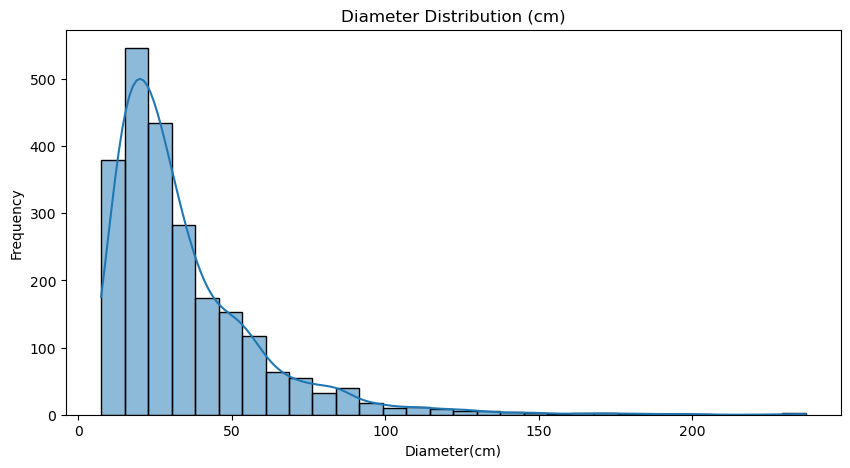

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
# Diameter distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Dbh(cm)'], bins=30, kde=True)
plt.title('Diameter Distribution (cm)')
plt.xlabel('Diameter(cm)')
plt.ylabel('Frequency')
plt.show()


C:\Users\olatu\AppData\Local\Temp\ipykernel_4316\3842522529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBH_Class', data=df, palette='Greens')


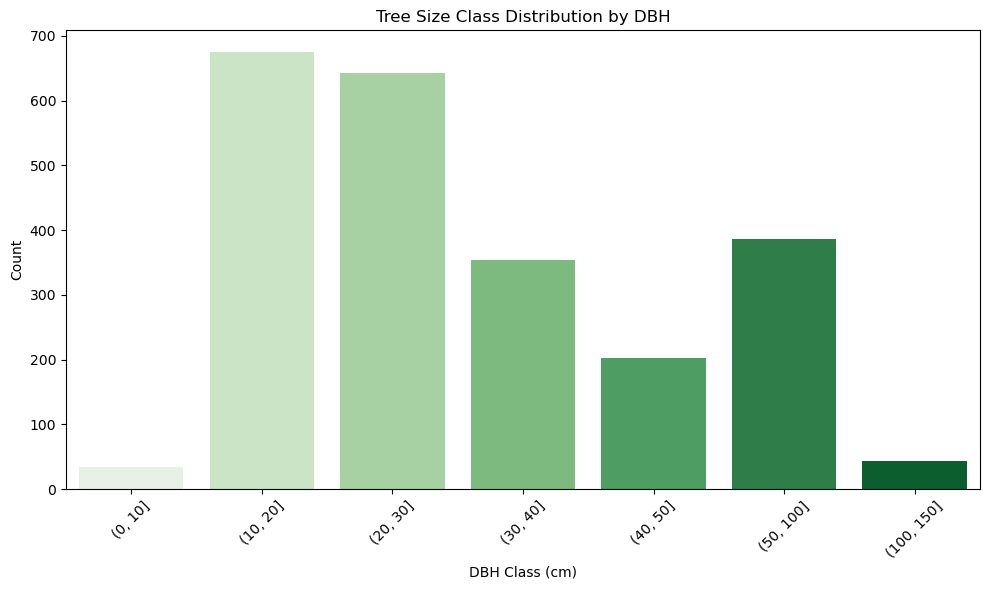

In [171]:
size_bins = [0, 10, 20, 30, 40, 50, 100, 150]
df['DBH_Class'] = pd.cut(df['Dbh(cm)'], bins=size_bins)

plt.figure(figsize=(10, 6))
sns.countplot(x='DBH_Class', data=df, palette='Greens')
plt.title('Tree Size Class Distribution by DBH')
plt.xlabel('DBH Class (cm)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your custom DBH bins
size_bins = [0, 10, 20, 30, 40, 50, 100, 150, 250,300]
df['DBH_Class'] = pd.cut(df['Dbh(cm)'], bins=size_bins)

# Calculate frequency for each DBH class
dbh_freq = df['DBH_Class'].value_counts().sort_index().reset_index()
dbh_freq.columns = ['DBH_Class', 'Frequency']

print("Frequency table for each DBH class:")
print(dbh_freq)

# If you want to save it:
dbh_freq.to_csv("dbh_class_frequency.csv", index=False)


Frequency table for each DBH class:
    DBH_Class  Frequency
0     (0, 10]         35
1    (10, 20]        675
2    (20, 30]        643
3    (30, 40]        354
4    (40, 50]        203
5   (50, 100]        387
6  (100, 150]         44
7  (150, 250]         12
8  (250, 300]          0


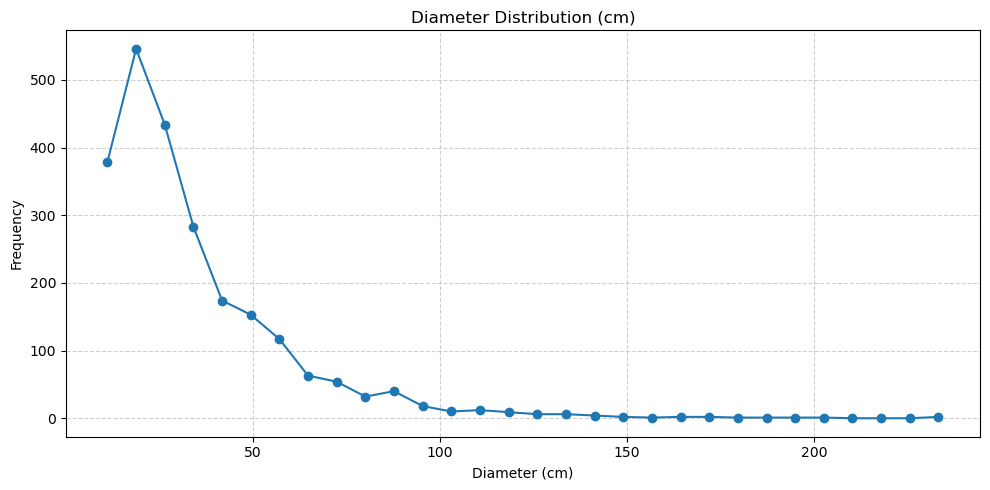

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Define the bins (match your histplot or set your own)
bin_edges = np.histogram_bin_edges(df['Dbh(cm)'], bins=30)
hist_counts, _ = np.histogram(df['Dbh(cm)'], bins=bin_edges)

# Use bin centers for the x-axis
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10,5))
plt.plot(bin_centers, hist_counts, marker='o', linestyle='-')
plt.title('Diameter Distribution (cm)')
plt.xlabel('Diameter (cm)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


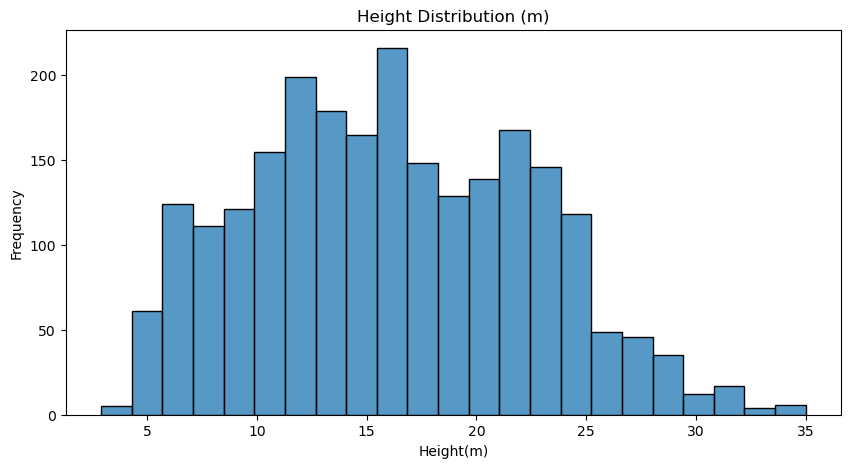

In [174]:
# Height distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Ht(m)'])
plt.title('Height Distribution (m)')
plt.xlabel('Height(m)')
plt.ylabel('Frequency')
plt.show()


Height Class Frequency Table:
  Height_Class  Frequency
0       [0, 5)         19
1      [5, 10)        407
2     [10, 15)        629
3     [15, 20)        582
4     [20, 25)        516
5     [25, 30)        162
6     [30, 40)         38


C:\Users\olatu\AppData\Local\Temp\ipykernel_4316\453389433.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Height_Class', y='Frequency', data=height_freq, palette='Blues')


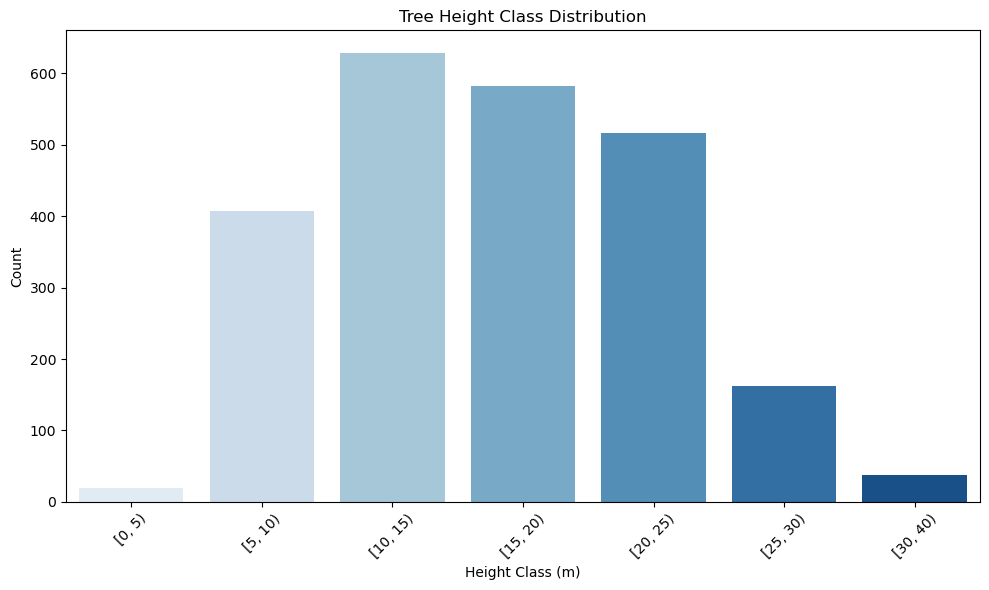

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define height bins
height_bins = [0, 5, 10, 15, 20, 25, 30, 40]
df['Height_Class'] = pd.cut(df['Ht(m)'], bins=height_bins, right=False)

# Frequency table for each height class
height_freq = df['Height_Class'].value_counts().sort_index().reset_index()
height_freq.columns = ['Height_Class', 'Frequency']

print("Height Class Frequency Table:")
print(height_freq)

# save to CSV
height_freq.to_csv("height_class_frequency.csv", index=False)

# Plot as bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x='Height_Class', y='Frequency', data=height_freq, palette='Blues')
plt.title('Tree Height Class Distribution')
plt.xlabel('Height Class (m)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("height_class_distribution.png", dpi=300)  # Save as PNG
plt.show()


In [176]:
# Species frequency and percentage 
species_freq = df['Tree Species'].value_counts().reset_index()
species_freq.columns = ['Tree Species', 'Frequency']
species_freq['Percentage'] = (species_freq['Frequency'] / species_freq['Frequency'].sum()) * 100

print("Species Frequency and Percentage (All)")
print(species_freq)  # Show all rows
species_freq.to_csv("species_frequency_percentage.csv", index=False)

# Family frequency and percentage
family_freq = df['Family'].value_counts().reset_index()
family_freq.columns = ['Family', 'Frequency']
family_freq['Percentage'] = (family_freq['Frequency'] / family_freq['Frequency'].sum()) * 100

print("\nFamily Frequency and Percentage (All)")
print(family_freq)  # Show all rows
family_freq.to_csv("family_frequency_percentage.csv", index=False)


Species Frequency and Percentage (All)
                    Tree Species  Frequency  Percentage
0                 Celtis zenkeri        137    5.822354
1       Ricinodendron heudelotii        113    4.802380
2                  Cola gigantea        108    4.589885
3                  Cola millenii        105    4.462388
4          Sterculia rhinopetala        102    4.334892
..                           ...        ...         ...
96   Entandrophgrama cylindricum          2    0.084998
97              Desplatsia lutea          2    0.084998
98         Entandrophgrama utile          1    0.042499
99            Antiaris africana           1    0.042499
100         Desplatsia dewevrei           1    0.042499

[101 rows x 3 columns]

Family Frequency and Percentage (All)
            Family  Frequency  Percentage
0        Malvaceae        690   29.324267
1         Fabaceae        259   11.007225
2    Euphorbiaceae        146    6.204845
3      Cannabaceae        144    6.119847
4         Morace

In [177]:
# Feature Engineering
import numpy as np

# Newton's formula for each row
df['Volume(m3)'] = (np.pi * df['Ht(m)'] / 24) * (
    df['Db(m)']**2 + 4 * df['Dm(m)']**2 + df['Dt(m)']**2
)

# Display first 5 rows to confirm
print(df[['Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)', 'Density', 'Volume(m3)']].head())

   Db(m)  Dm(m)  Dt(m)  Ht(m)  Density  Volume(m3)
0   0.18   0.11   0.02    6.8     0.43    0.072278
1   0.10   0.06   0.03    5.8     0.43    0.019208
2   0.39   0.18   0.07   16.5     0.59    0.619012
3   0.31   0.18   0.10   19.5     0.59    0.601635
4   0.32   0.18   0.07   28.0     0.59    0.868284


In [178]:
# Basal area 
df['Dbh(m)'] = df['Dbh(cm)'] / 100
df['Basal_Area(m2)'] = (np.pi / 4) * (df['Dbh(m)']**2)
# Display first 5 rows to confirm
print(df[['Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)', 'Density','Volume(m3)','Basal_Area(m2)' ]].head())


   Db(m)  Dm(m)  Dt(m)  Ht(m)  Density  Volume(m3)  Basal_Area(m2)
0   0.18   0.11   0.02    6.8     0.43    0.072278        0.008171
1   0.10   0.06   0.03    5.8     0.43    0.019208        0.006362
2   0.39   0.18   0.07   16.5     0.59    0.619012        0.054325
3   0.31   0.18   0.10   19.5     0.59    0.601635        0.080425
4   0.32   0.18   0.07   28.0     0.59    0.868284        0.985203


In [179]:
# Calculate Aboveground Biomass (AGB)
# 1. After computing Volume(m3) and converting Density to kg/m³:
df["Density_kg_m3"] = df["Density"] * 1000      # Density was in g/cm³

# 2. Compute AGB directly from Volume × Density:
df["AGB(kg)"] = df["Volume(m3)"] * df["Density_kg_m3"]

# 3. Belowground and carbon:
df["BGB(kg)"]           = df["AGB(kg)"] * 0.24
df["Total_Biomass(kg)"] = df["AGB(kg)"] + df["BGB(kg)"]
df["Carbon(kg)"]        = df["Total_Biomass(kg)"] * 0.5
df["CO2_eq(kg)"]        = df["Carbon(kg)"] * 3.67

# Display first 5 rows to confirm
print(df[[
    'Db(m)', 'Dm(m)', 'Dt(m)', 'Ht(m)', 'Density',
    'Volume(m3)', 'Basal_Area(m2)', 'Total_Biomass(kg)',
    'Carbon(kg)', 'CO2_eq(kg)'
]].head())


   Db(m)  Dm(m)  Dt(m)  Ht(m)  Density  Volume(m3)  Basal_Area(m2)  \
0   0.18   0.11   0.02    6.8     0.43    0.072278        0.008171   
1   0.10   0.06   0.03    5.8     0.43    0.019208        0.006362   
2   0.39   0.18   0.07   16.5     0.59    0.619012        0.054325   
3   0.31   0.18   0.10   19.5     0.59    0.601635        0.080425   
4   0.32   0.18   0.07   28.0     0.59    0.868284        0.985203   

   Total_Biomass(kg)  Carbon(kg)   CO2_eq(kg)  
0          38.538403   19.269201    70.717969  
1          10.241823    5.120912    18.793746  
2         452.868859  226.434430   831.014356  
3         440.155894  220.077947   807.686065  
4         635.236464  317.618232  1165.658912  


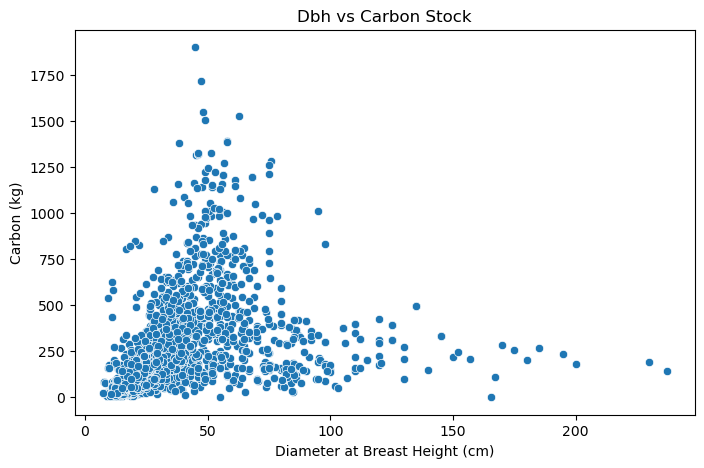

In [180]:
# Relationship between DBH and Carbon Stock in trees
plt.figure(figsize=(8,5))
sns.scatterplot(x='Dbh(cm)', y='Carbon(kg)', data=df)
plt.title('Dbh vs Carbon Stock')
plt.xlabel('Diameter at Breast Height (cm)')
plt.ylabel('Carbon (kg)')
plt.show()


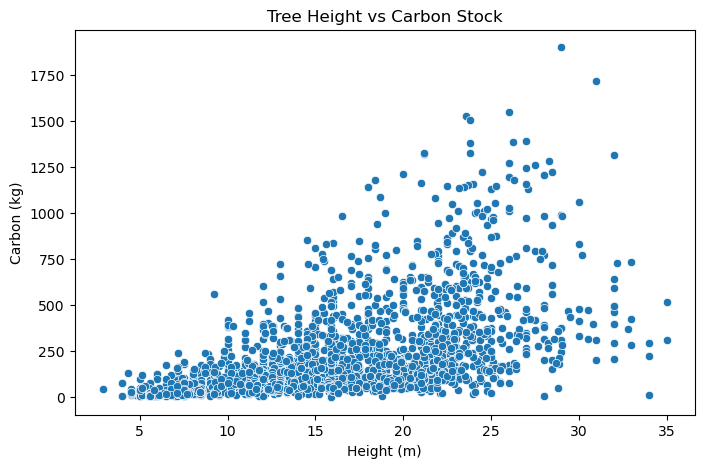

In [181]:
# Relationship between Height and Carbon Stock of tree
plt.figure(figsize=(8,5))
sns.scatterplot(x='Ht(m)', y='Carbon(kg)', data=df)
plt.title('Tree Height vs Carbon Stock')
plt.xlabel('Height (m)')
plt.ylabel('Carbon (kg)')
plt.show()

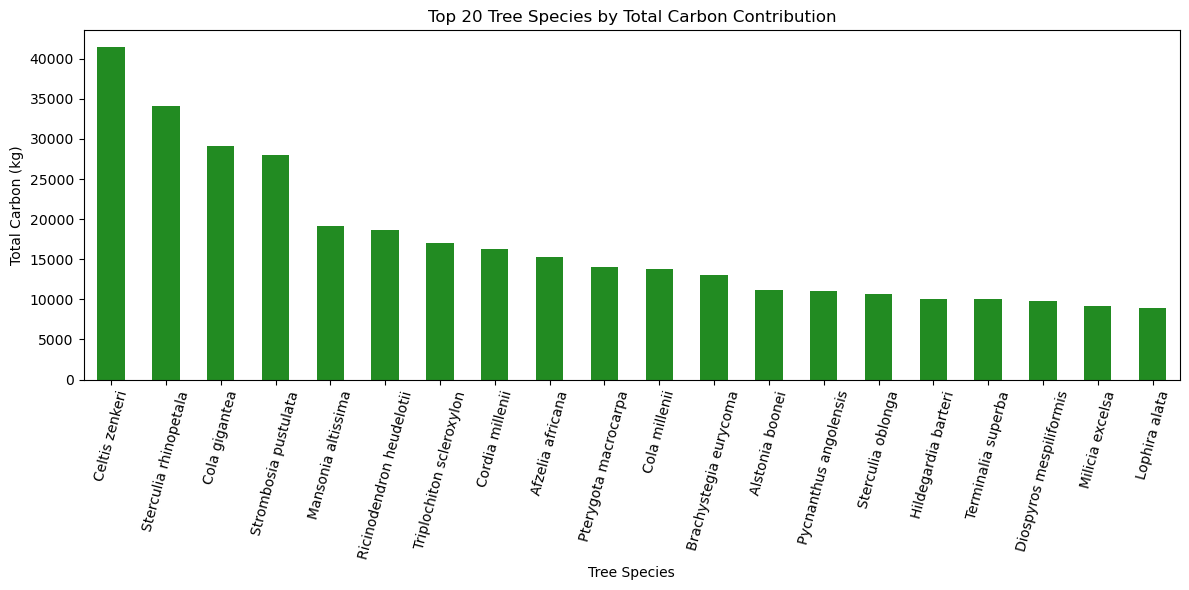

In [182]:
# Species Contribution to Carbon 
species_carbon = df.groupby('Tree Species')['Carbon(kg)'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
species_carbon.plot(kind='bar', color='forestgreen')
plt.title('Top 20 Tree Species by Total Carbon Contribution')
plt.xlabel('Tree Species')
plt.ylabel('Total Carbon (kg)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [183]:
import pandas as pd

# Group by species and family and get average of each variable
species_mean = (
    df.groupby(['Tree Species', 'Family'])
      .agg(
          Count=('Dbh(cm)', 'count'),
          Mean_DBH=('Dbh(cm)', 'mean'),
          Mean_Volume=('Volume(m3)', 'mean'),
          Mean_Height=('Ht(m)', 'mean'),
          Mean_BA=('Basal_Area(m2)', 'mean'),
          Mean_Biomass=('Total_Biomass(kg)', 'mean'),
          Mean_Carbon=('Carbon(kg)', 'mean')
      )
      .reset_index()
)

species_mean = species_mean.round(2)

# Display the table
print(species_mean)

# Save to CSV/Excel
species_mean.to_csv("species_family_means.csv", index=False)
species_mean.to_excel("species_family_means.xlsx", index=False)


                   Tree Species       Family  Count  Mean_DBH  Mean_Volume  \
0              Afzelia africana     Fabaceae     34     79.14         1.08   
1            Albizia ferruginea     Fabaceae     19     32.92         0.99   
2               Albizia lebbeck     Fabaceae      5     42.98         0.54   
3                 Albizia zygia     Fabaceae     11     26.35         0.58   
4               Alstonia boonei  Apocynaceae     42     37.73         1.16   
..                          ...          ...    ...       ...          ...   
97     Triplochiton scleroxylon    Malvaceae     62     50.90         1.30   
98                Vitex doniana    Limiaceae     10     24.01         0.25   
99           Xylopia aethiopica   Annonaceae     11     25.45         0.41   
100      Zanthoxylum leprieurii     Rutaceae      6     24.75         0.61   
101  Zanthoxylum zanthoxyloides     Rutaceae     17     24.56         0.35   

     Mean_Height  Mean_BA  Mean_Biomass  Mean_Carbon  
0       

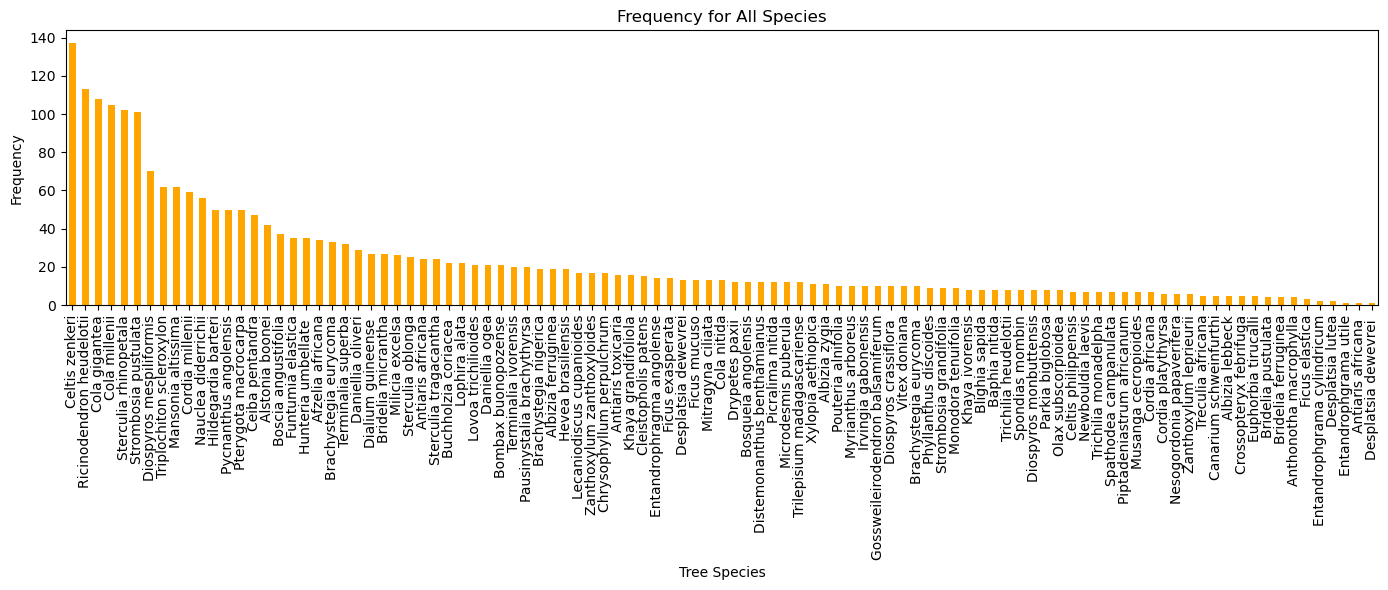

In [184]:
import matplotlib.pyplot as plt

# Frequency for all species
species_freq = df['Tree Species'].value_counts()

plt.figure(figsize=(14, 6))
species_freq.plot(kind='bar', color='orange')
plt.title('Frequency for All Species')
plt.xlabel('Tree Species')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [185]:
# Aggregate total carbon and frequency by species
species_summary = (
    df.groupby('Tree Species')
    .agg(Total_Carbon_kg=('Carbon(kg)', 'sum'), Frequency=('Tree Species', 'size'))
    .sort_values('Total_Carbon_kg', ascending=False)
)

# Display the full table
print(species_summary)

# Save to CSV
species_summary.to_csv("species_carbon_frequency_summary.csv")


                             Total_Carbon_kg  Frequency
Tree Species                                           
Celtis zenkeri                  41469.156224        137
Sterculia rhinopetala           34131.754636        102
Cola gigantea                   29076.243206        108
Strombosia pustulata            27972.734508        101
Mansonia altissima              19155.282528         62
...                                      ...        ...
Antiaris africana                  83.995412          1
Desplatsia lutea                   68.810656          2
Entandrophgrama utile              43.635308          1
Entandrophgrama cylindricum        34.950611          2
Ficus elastica                     30.566044          3

[101 rows x 2 columns]


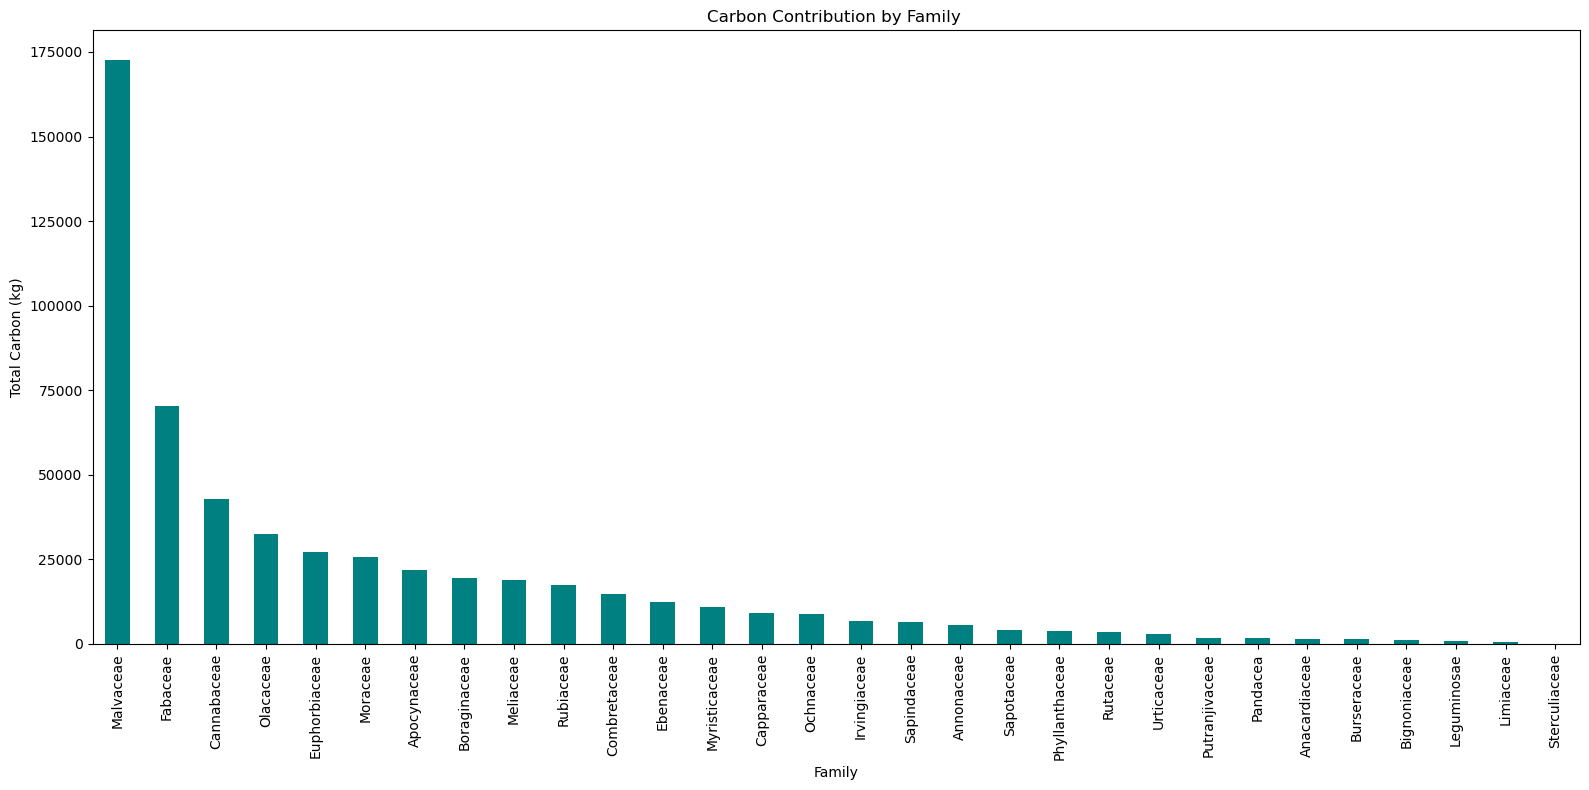

In [186]:
import matplotlib.pyplot as plt

# 1. Aggregate carbon by family
family_carbon = (
    df
    .groupby('Family')['Carbon(kg)']
    .sum()
    .sort_values(ascending=False)
)

# 2.Plot all families
plt.figure(figsize=(16, 8))
family_carbon.plot(
    kind='bar',
    color='teal'
)
plt.title('Carbon Contribution by Family ')
plt.xlabel('Family')
plt.ylabel('Total Carbon (kg)')
plt.xticks(rotation=90)   # rotate labels for clarity
plt.tight_layout()
plt.show()


                Total_Carbon(kg)  Frequency
Family                                     
Malvaceae          172756.326750        690
Fabaceae            70328.472983        259
Cannabaceae         42721.454219        144
Olacaceae           32529.510385        118
Euphorbiaceae       27129.228508        146
Moraceae            25673.439750        126
Apocynaceae         21789.035144        124
Boraginaceae        19486.989963         72
Meliaceae           18790.340318         77
Rubiaceae           17462.302900         94
Combretaceae        14752.259389         52
Ebenaceae           12324.831963         88
Myristicaceae       10990.973892         50
Capparaceae          9022.260693         59
Ochnaceae            8964.348658         22
Irvingiaceae         6808.379723         10
Sapindaceae          6556.665511         25
Annonaceae           5742.148710         35
Sapotaceae           4046.637169         17
Phyllanthaceae       3811.185024         35
Rutaceae             3521.393688

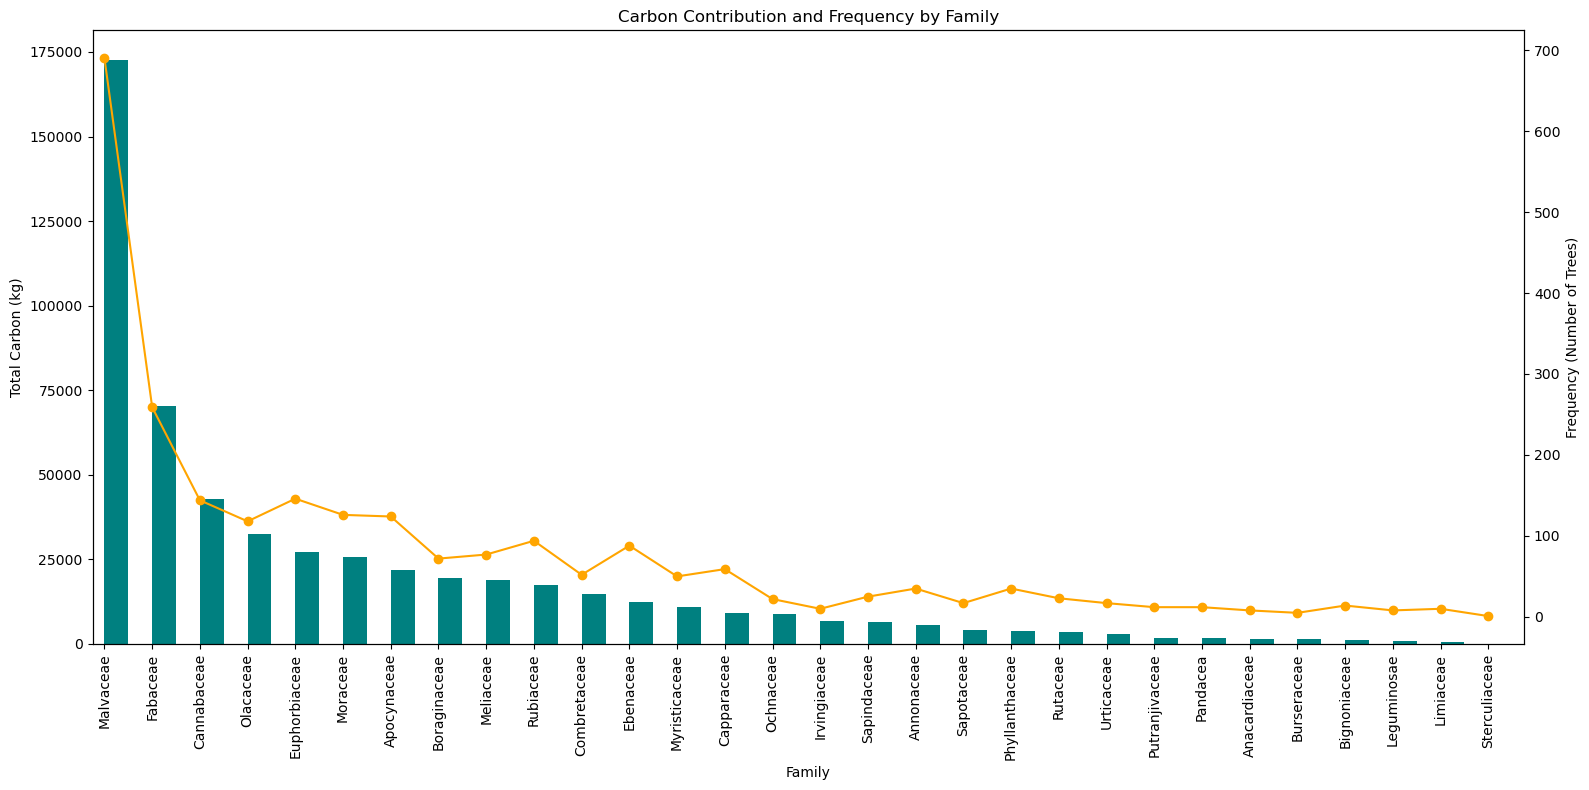

In [187]:
import matplotlib.pyplot as plt

# 1. Aggregate carbon by family 
family_carbon = (
    df
    .groupby('Family')['Carbon(kg)']
    .sum()
    .sort_values(ascending=False)
)

# 2. Aggregate frequency by family
family_freq = (
    df
    .groupby('Family')
    .size()
    .reindex(family_carbon.index)  
)

# 3. Combine into a DataFrame for inspection
family_summary = pd.DataFrame({
    'Total_Carbon(kg)': family_carbon,
    'Frequency': family_freq
})

print(family_summary.head(35))  # See top 10 families

family_summary.to_csv('family_carbon_freq_summary.csv')

# 4. Plot: Carbon (bar) + Frequency (line) for all families
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for carbon
family_carbon.plot(kind='bar', color='teal', ax=ax1, position=0)
ax1.set_ylabel('Total Carbon (kg)')
ax1.set_xlabel('Family')
ax1.set_title('Carbon Contribution and Frequency by Family')
ax1.tick_params(axis='x', rotation=90)

# Line plot for frequency
ax2 = ax1.twinx()
family_freq.plot(kind='line', color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Frequency (Number of Trees)')

plt.tight_layout()
plt.show()


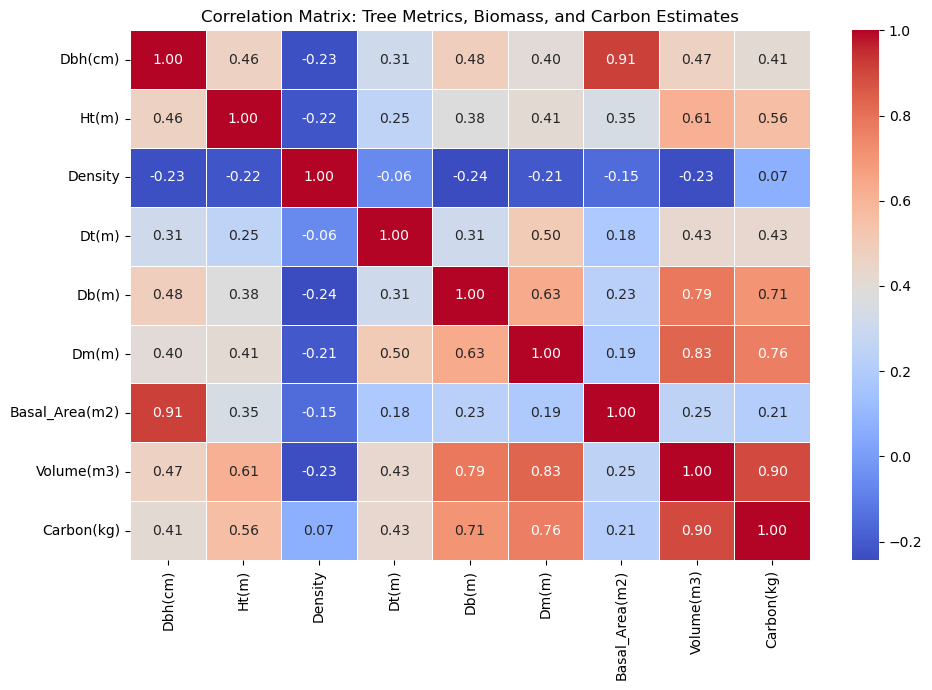

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
cols = ['Dbh(cm)', 'Ht(m)', 'Density', 'Dt(m)', 'Db(m)', 'Dm(m)', 'Basal_Area(m2)', 'Volume(m3)',
         'Carbon(kg)']

# Compute correlation matrix
corr = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Tree Metrics, Biomass, and Carbon Estimates')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Model performance on hold-out set:
Linear Regression         → MSE:   22379.16,  R²: 0.70
Random Forest             → MSE:   14456.29,  R²: 0.81
Gradient Boosting         → MSE:   15672.12,  R²: 0.79
Support Vector Regressor  → MSE:   34987.63,  R²: 0.53


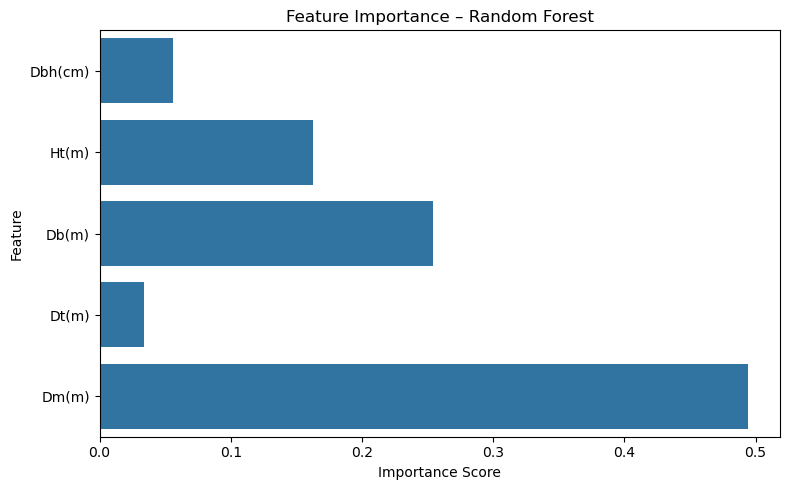

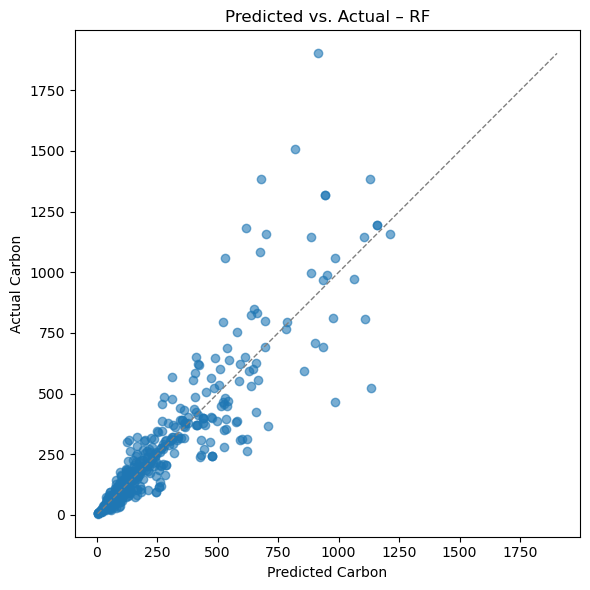

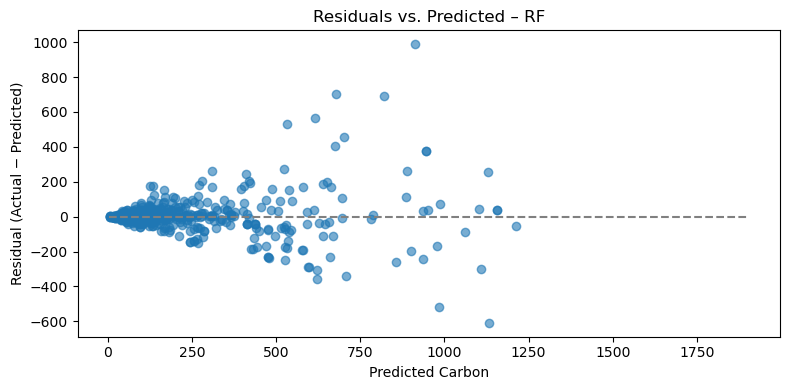

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for the barplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 1) Select features & target
X = df[['Dbh(cm)', 'Ht(m)', 'Db(m)','Dt(m)', 'Dm(m)']]
y = df['Carbon(kg)']

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Initialize your models
models = {
    'Linear Regression':       LinearRegression(),
    'Random Forest':           RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting':       GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1),
}

# 4) Fit each, evaluate on the test set, and capture the RF
rf_model = None
rf_y_pred = None

print("Model performance on hold-out set:")
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print(f"{name:<25} → MSE: {mse:10.2f},  R²: {r2:.2f}")
    if name == 'Random Forest':
        rf_model   = mdl
        rf_y_pred  = y_pred

# 5) Plot RF feature importances
feature_names = X.columns
importances   = rf_model.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance – Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6) Residual analysis for RF
residuals = y_test - rf_y_pred

# 6a) Predicted vs. Actual
plt.figure(figsize=(6, 6))
plt.scatter(rf_y_pred, y_test, alpha=0.6)
lims = [min(rf_y_pred.min(), y_test.min()), max(rf_y_pred.max(), y_test.max())]
plt.plot(lims, lims, '--', linewidth=1, color='gray')
plt.xlabel("Predicted Carbon")
plt.ylabel("Actual Carbon")
plt.title("Predicted vs. Actual – RF")
plt.tight_layout()
plt.show()

# 6b) Residuals vs. Predicted
plt.figure(figsize=(8, 4))
plt.scatter(rf_y_pred, residuals, alpha=0.6)
plt.hlines(0, lims[0], lims[1], linestyles='--', color='gray')
plt.xlabel("Predicted Carbon")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residuals vs. Predicted – RF")
plt.tight_layout()
plt.show()



In [113]:
import joblib
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

best_score = -float("inf")
best_model = None
best_name = None

print("\nCross-validated performance (5-fold):")
for name, mdl in models.items():
    r2_cv  = cross_val_score(mdl, X, y, cv=kf, scoring='r2')
    mse_cv = cross_val_score(mdl, X, y, cv=kf, scoring=mse_scorer)
    
    mean_r2  = r2_cv.mean()
    mean_mse = -mse_cv.mean()
    
    print(f"{name:<25} → CV R²: {mean_r2:.2f} ± {r2_cv.std():.2f},  CV MSE: {mean_mse:.2f} ± {mse_cv.std():.2f}")
    
    # Select the best model by highest R²
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model = mdl
        best_name = name

# Fit the best model on all data
best_model.fit(X, y)

# Save it
joblib.dump(best_model, "best_carbon_model.joblib")
print(f"✅ Best model ({best_name}) saved to best_carbon_model.joblib")



Cross-validated performance (5-fold):
Linear Regression         → CV R²: 0.72 ± 0.03,  CV MSE: 39745.17 ± 5828.17
Random Forest             → CV R²: 0.87 ± 0.02,  CV MSE: 19406.49 ± 4319.68
Gradient Boosting         → CV R²: 0.85 ± 0.02,  CV MSE: 21630.43 ± 4147.78
Support Vector Regressor  → CV R²: 0.62 ± 0.03,  CV MSE: 55405.78 ± 6803.44
✅ Best model (Random Forest) saved to best_carbon_model.joblib


In [114]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

results = []
for name, mdl in models.items():
    r2_cv  = cross_val_score(mdl, X, y, cv=kf, scoring='r2')
    mse_cv = cross_val_score(mdl, X, y, cv=kf, scoring=mse_scorer)
    results.append({
        "Model": name,
        "CV R2 Mean": r2_cv.mean(),
        "CV R2 Std": r2_cv.std(),
        "CV MSE Mean": -mse_cv.mean(),
        "CV MSE Std": mse_cv.std()
    })
cv_df = pd.DataFrame(results)


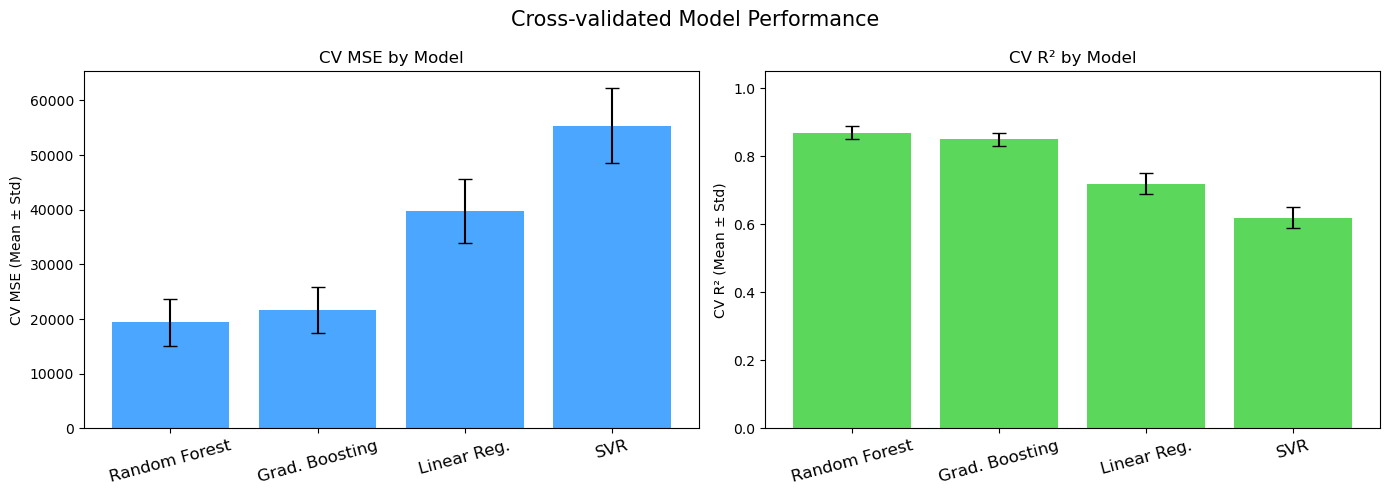

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'Support Vector Regressor']
cv_mse_means = [19406, 21630, 39745, 55406]
cv_mse_stds = [4320, 4148, 5828, 6803]
cv_r2_means = [0.87, 0.85, 0.72, 0.62]
cv_r2_stds = [0.02, 0.02, 0.03, 0.03]

# Neat, short, professional labels
pretty_labels = ['Random Forest', 'Grad. Boosting', 'Linear Reg.', 'SVR']

x = np.arange(len(models))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MSE bar plot
ax1.bar(x, cv_mse_means, yerr=cv_mse_stds, color='dodgerblue', alpha=0.8, capsize=5)
ax1.set_xticks(x)
ax1.set_xticklabels(pretty_labels, rotation=15, fontsize=12)
ax1.set_ylabel('CV MSE (Mean ± Std)')
ax1.set_title('CV MSE by Model')

# R2 bar plot
ax2.bar(x, cv_r2_means, yerr=cv_r2_stds, color='limegreen', alpha=0.8, capsize=5)
ax2.set_xticks(x)
ax2.set_xticklabels(pretty_labels, rotation=15, fontsize=12)
ax2.set_ylabel('CV R² (Mean ± Std)')
ax2.set_ylim(0, 1.05)
ax2.set_title('CV R² by Model')

plt.suptitle('Cross-validated Model Performance', fontsize=15)
plt.tight_layout()
plt.show()


   Feature  Importance
4    Dm(m)    0.607878
2    Db(m)    0.159831
1    Ht(m)    0.151032
0  Dbh(cm)    0.048847
3    Dt(m)    0.032412


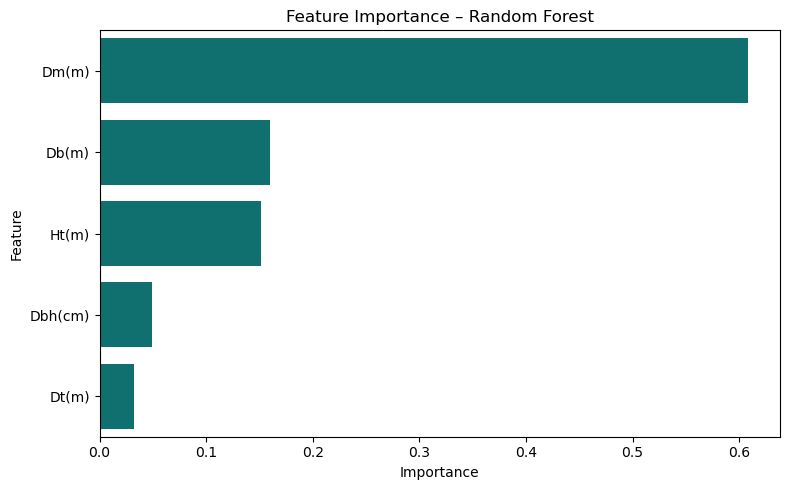

In [116]:
# Fit Random Forest on all data for final feature importance
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X, y)
importances = rf_final.feature_importances_
feature_names = X.columns

# Feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print(feat_imp_df)
feat_imp_df.to_csv("feature_importance_rf.csv", index=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, color='teal')
plt.title('Feature Importance – Random Forest')
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300)
plt.show()


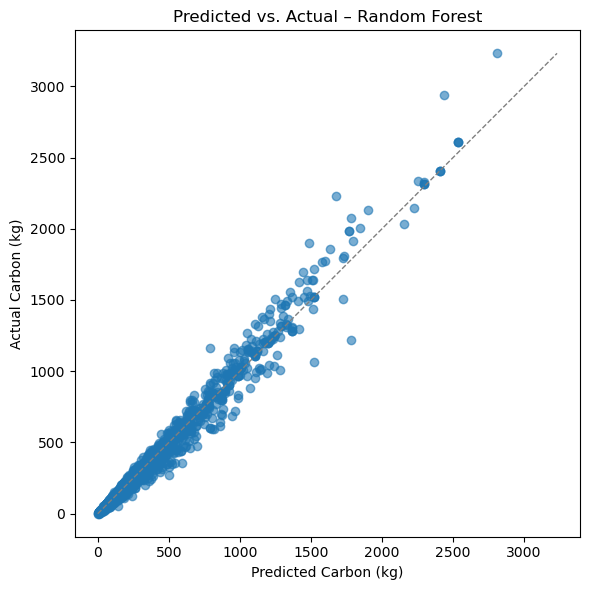

In [41]:
y_pred_rf = rf_final.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(y_pred_rf, y, alpha=0.6)
lims = [min(y_pred_rf.min(), y.min()), max(y_pred_rf.max(), y.max())]
plt.plot(lims, lims, '--', linewidth=1, color='gray')
plt.xlabel("Predicted Carbon (kg)")
plt.ylabel("Actual Carbon (kg)")
plt.title("Predicted vs. Actual – Random Forest")
plt.tight_layout()
plt.savefig('actual_vs_pred_rf.png', dpi=300)
plt.show()


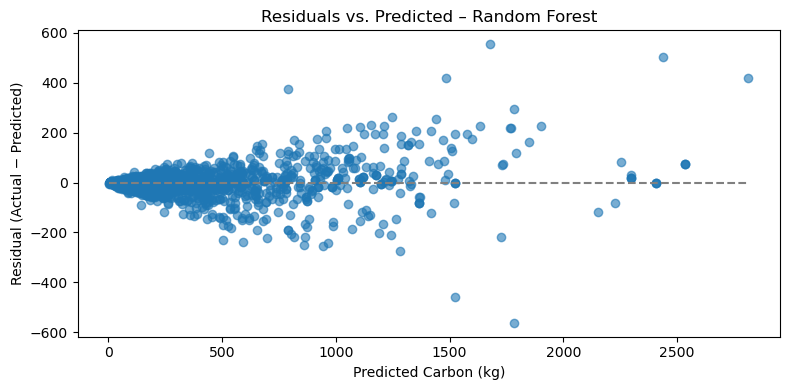

In [42]:
residuals = y - y_pred_rf
plt.figure(figsize=(8,4))
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.hlines(0, y_pred_rf.min(), y_pred_rf.max(), linestyles='--', color='gray')
plt.xlabel("Predicted Carbon (kg)")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residuals vs. Predicted – Random Forest")
plt.tight_layout()
plt.savefig('residuals_rf.png', dpi=300)
plt.show()


                          Total_Carbon_kg  Frequency
Tree Species                                        
Celtis zenkeri               53418.298338        137
Sterculia rhinopetala        45656.625961        102
Cola gigantea                36010.423825        108
Strombosia pustulata         32392.423290        101
Ricinodendron heudelotii     25770.311434        113
Mansonia altissima           24748.910155         62
Cordia millenii              23148.055441         59
Triplochiton scleroxylon     21633.482519         62
Afzelia africana             20842.021560         34
Hildegardia barteri          19973.531717         50
Brachystegia eurycoma        17825.684893         33
Pterygota macrocarpa         17613.688776         50
Milicia excelsa              17144.466348         26
Pycnanthus angolensis        15701.323172         50
Cola millenii                13753.291988        105
Terminalia superba           13651.339418         32
Alstonia boonei              13137.479216     

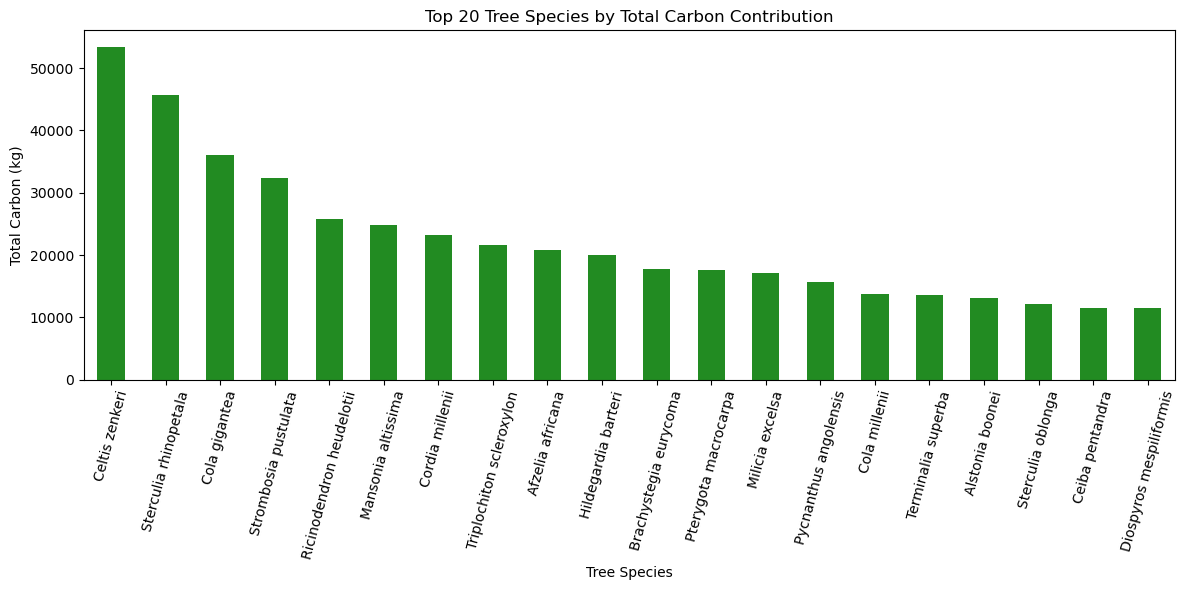

               Total_Carbon_kg  Frequency
Family                                   
Malvaceae        222309.112709        690
Fabaceae          87897.683914        259
Cannabaceae       54670.596332        144
Moraceae          38962.871276        126
Olacaceae         36949.199167        118
Euphorbiaceae     35384.265843        146
Meliaceae         28168.511687         77
Boraginaceae      27052.184648         72
Apocynaceae       24683.837445        124
Rubiaceae         21030.004815         94
Combretaceae      19556.971349         52
Myristicaceae     15701.323172         50
Ebenaceae         14057.381592         88
Capparaceae        9123.662507         59
Ochnaceae          8964.348658         22
Sapindaceae        7737.983400         25
Annonaceae         7456.055091         35
Irvingiaceae       6953.774265         10
Urticaceae         4288.793477         17
Sapotaceae         4046.637169         17


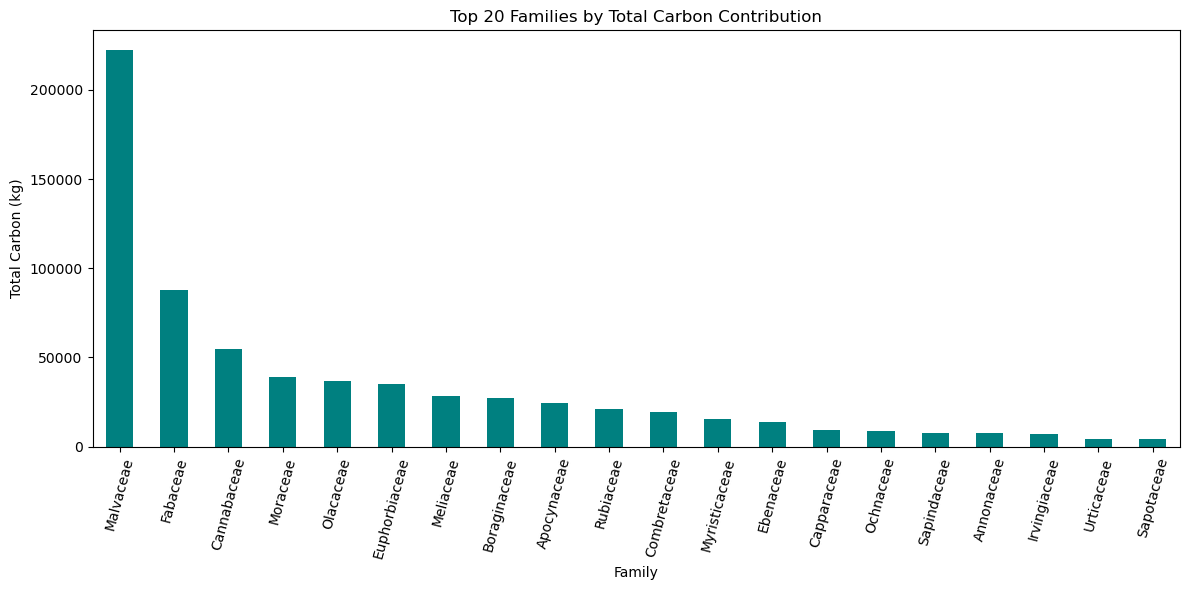

In [139]:
# Species
species_summary = (
    df.groupby('Tree Species')
    .agg(Total_Carbon_kg=('Carbon(kg)', 'sum'), Frequency=('Tree Species', 'size'))
    .sort_values('Total_Carbon_kg', ascending=False)
)
print(species_summary.head(20))
species_summary.to_csv("species_carbon_frequency_summary.csv")

# Bar plot for top 20 species
plt.figure(figsize=(12, 6))
species_summary['Total_Carbon_kg'].head(20).plot(kind='bar', color='forestgreen')
plt.title('Top 20 Tree Species by Total Carbon Contribution')
plt.xlabel('Tree Species')
plt.ylabel('Total Carbon (kg)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('top20_species_carbon.png', dpi=300)
plt.show()

# Family
family_summary = (
    df.groupby('Family')
    .agg(Total_Carbon_kg=('Carbon(kg)', 'sum'), Frequency=('Family', 'size'))
    .sort_values('Total_Carbon_kg', ascending=False)
)
print(family_summary.head(20))
family_summary.to_csv("family_carbon_freq_summary.csv")

plt.figure(figsize=(12, 6))
family_summary['Total_Carbon_kg'].head(20).plot(kind='bar', color='teal')
plt.title('Top 20 Families by Total Carbon Contribution')
plt.xlabel('Family')
plt.ylabel('Total Carbon (kg)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('top20_family_carbon.png', dpi=300)
plt.show()


In [140]:
import numpy as np
import pandas as pd

def compute_diversity_indices(group):
    species_counts = group['Tree Species'].value_counts()
    proportions = species_counts / species_counts.sum()
    # Shannon index
    shannon = -(proportions * np.log(proportions)).sum()
    # Simpson index
    simpson = 1 - (proportions ** 2).sum()
    return pd.Series({
        'Total_Individuals': species_counts.sum(),
        'Shannon_Index': shannon
    })

diversity_df = df.groupby('Plot Id').apply(compute_diversity_indices).reset_index()
print(diversity_df.head())
diversity_df.to_csv('diversity_indices_per_plot.csv', index=False)


     Plot Id  Total_Individuals  Shannon_Index
0   Plot 1_1               20.0       2.224098
1   Plot 1_2               20.0       2.176034
2   Plot 1_3               26.0       2.717851
3   Plot10_1               35.0       2.270177
4  Plot10_10               25.0       2.189707


C:\Users\olatu\AppData\Local\Temp\ipykernel_4316\3679245429.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_df = df.groupby('Plot Id').apply(compute_diversity_indices).reset_index()


In [76]:
import numpy as np
import pandas as pd

def compute_diversity_indices(group):
    species_counts = group['Tree Species'].value_counts()
    proportions = species_counts / species_counts.sum()
    # Shannon index
    shannon = -(proportions * np.log(proportions)).sum()
    return pd.Series({
        'Total_Individuals': species_counts.sum(),
        'Shannon_Index': shannon
    })

diversity_df = df.groupby('Forest Id').apply(compute_diversity_indices).reset_index()
print(diversity_df.head())
diversity_df.to_csv('diversity_indices_Forest.csv', index=False)


   Forest Id  Total_Individuals  Shannon_Index
0          1              167.0       3.457702
1          2              423.0       3.648110
2          3              208.0       3.458522
3          4              315.0       3.875820
4          5              120.0       3.014577


C:\Users\olatu\AppData\Local\Temp\ipykernel_4316\2000111489.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_df = df.groupby('Forest Id').apply(compute_diversity_indices).reset_index()


In [137]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from IPython.display import display

# 1) Plot-level species table
plot_sp = (df.groupby(['Plot Id','Tree Species']).size().unstack(fill_value=0))

# 2) Shannon Index per plot
diversity_plot = (
    plot_sp.apply(lambda r: entropy(r[r>0], base=np.e), axis=1)
           .rename('Shannon_Index')
           .reset_index()
)

# 3) Plot-level structure
structure_df = (
    df.groupby('Plot Id')
      .agg(
          Avg_DBH_cm=('Dbh(cm)', 'mean'),
          Avg_Height_m=('Ht(m)', 'mean'),
          Total_Basal_Area_m2=('Basal_Area(m2)', 'sum'),
          Avg_Density=('Density', 'mean'),
          Total_Carbon_kg=('Carbon(kg)', 'sum')
      )
      .reset_index()
)

# 4) Merge structure + diversity
summary_df = structure_df.merge(diversity_plot, on='Plot Id', how='inner')

# 5) Save as CSV
summary_df.to_csv("plot_summary_with_diversity.csv", index=False)

# 6) Display preview
display(summary_df.head())

print("✅ Data saved as 'plot_summary_with_diversity.csv'")


,Plot Id,Avg_DBH_cm,Avg_Height_m,Total_Basal_Area_m2,Avg_Density,Total_Carbon_kg,Shannon_Index
0,Plot 1_1,30.455000,15.560000,2.221251,0.572000,4347.472924,2.224098
1,Plot 1_2,26.500000,14.520000,1.560921,0.539000,5152.792127,2.176034
2,Plot 1_3,18.765385,12.634615,0.885024,0.611923,3488.318271,2.717851
3,Plot10_1,27.537143,19.597143,2.700658,0.554000,8796.781905,2.270177
4,Plot10_10,28.724000,19.000000,2.257369,0.545200,6723.479800,2.189707


✅ Data saved as 'plot_summary_with_diversity.csv'


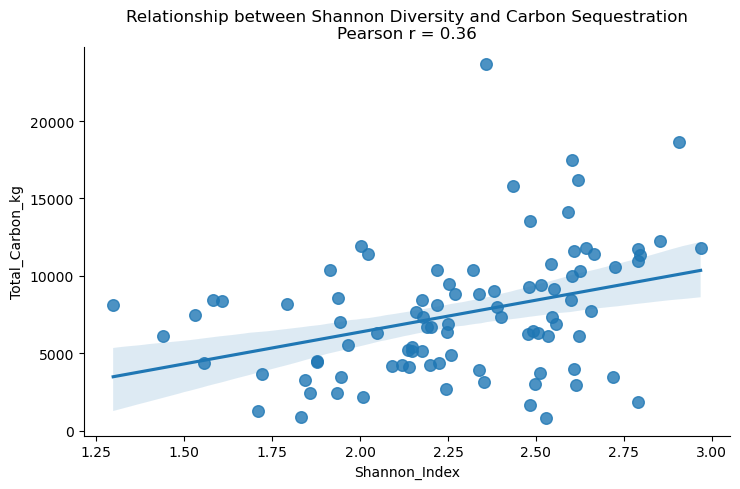

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Compute Pearson r and p-value
r, p = pearsonr(summary_df['Shannon_Index'], summary_df['Total_Carbon_kg'])

# Create the plot
g = sns.lmplot(
    data=summary_df,
    x='Shannon_Index',
    y='Total_Carbon_kg',
    aspect=1.5,
    scatter_kws={'s':70}
)
plt.title(
    f'Relationship between Shannon Diversity and Carbon Sequestration\n'
    f'Pearson r = {r:.2f}'
)
plt.tight_layout()
plt.show()


RandomForest → MSE: 0.0266, R²: 0.5012
XGBoost → MSE: 0.0592, R²: -0.1092
KNN → MSE: 0.0232, R²: 0.5660
SVR → MSE: 0.0572, R²: -0.0727

✅ Best Model: KNN


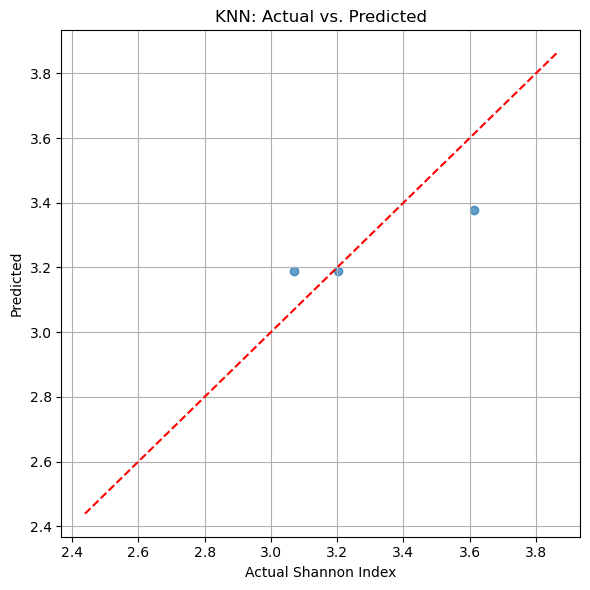

In [83]:
# Tree divesity Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


# Loading of Dataset 
df = pd.read_csv("Dataset.csv")
df.columns = df.columns.str.strip().str.replace(" ", "")  # Clean column names

# Handle Missing and Outliers 
required_cols = ["Dbh(cm)", "Ht(m)", "Db(m)", "Dm(m)", "Dt(m)", "Density"]
for col in required_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(df[col].median())

for col in ["Dbh(cm)", "Ht(m)"]:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Basal Area 
df["Basal_Area(m2)"] = np.pi * ((df["Dbh(cm)"] / 100) / 2) ** 2

# Compute Shannon Index 
def compute_shannon(series):
    freq = series.value_counts()
    p = freq / freq.sum()
    return -(p * np.log(p)).sum()

diversity_df = (
    df.groupby("Plot Id")
    .agg(Total_Individuals=('TreeSpecies', 'count'),
         Shannon_H=('TreeSpecies', compute_shannon))
    .reset_index()
)

# Structural Features 
structure_df = (
    df.groupby("Plot Id")
    .agg(
        Avg_DBH_cm=('Dbh(cm)', 'mean'),
        Avg_Height_m=('Ht(m)', 'mean'),
        Total_Basal_Area_m2=('Basal_Area(m2)', 'sum'),
        Avg_Density=('Density', 'mean')
    )
    .reset_index()
)

# Feature Engineering 
structure_df['DBH_Height_Interaction'] = structure_df['Avg_DBH_cm'] * structure_df['Avg_Height_m']
structure_df['DBH_Height_Density_Interaction'] = (
    structure_df['Avg_DBH_cm'] * structure_df['Avg_Height_m'] * structure_df['Avg_Density']
)

# Mer
final_df = pd.merge(diversity_df, structure_df, on="Plot Id")

# Train-Test Split 
features = [
    'Avg_DBH_cm', 'Avg_Height_m', 'Total_Basal_Area_m2',
    'Avg_Density', 'DBH_Height_Interaction', 'DBH_Height_Density_Interaction'
]
X = final_df[features]
y = final_df["Shannon_H"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model Comparison 
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror'),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf')
}

results = {}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    
    if name in ["SVR", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} → MSE: {mse:.4f}, R²: {r2:.4f}")

# Visualization 
best_model_name = max(results, key=lambda m: results[m]["R2"])
print(f"\n✅ Best Model: {best_model_name}")

best_model = models[best_model_name]
if best_model_name in ["SVR", "KNN"]:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Shannon Index")
plt.ylabel("Predicted")
plt.title(f"{best_model_name}: Actual vs. Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
